##  **Some Helper Function:**

### Softmax Function:

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [16]:
import numpy as np

def softmax(z):
    """
    Compute the softmax probabilities for a given input matrix.
    """
    # Subtract max for numerical stability
    z_shifted = z - np.max(z, axis=1, keepdims=True)
    # Compute exponentials
    exp_scores = np.exp(z_shifted)
    # Normalize to get probabilities
    return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)


### Softmax Test Case:

This test case checks that each row in the resulting softmax probabilities sums to 1, which is the fundamental property of softmax.

In [17]:
# Example test case
z_test = np.array([[2.0, 1.0, 0.1], [1.0, 1.0, 1.0]])
softmax_output = softmax(z_test)

# Verify if the sum of probabilities for each row is 1 using assert
row_sums = np.sum(softmax_output, axis=1)

# Assert that the sum of each row is 1
assert np.allclose(row_sums, 1), f"Test failed: Row sums are {row_sums}"

print("Softmax function passed the test case!")

Softmax function passed the test case!


### Prediction Function:

In [18]:
def predict_softmax(X, W, b):
    """
    Predict class labels using softmax regression.
    """
    # Compute logits: z = XW + b
    z = np.dot(X, W) + b
    # Get probabilities using softmax
    probs = softmax(z)
    # Return class with highest probability
    predicted_classes = np.argmax(probs, axis=1)
    return predicted_classes

### Test Function for Prediction Function:
The test function ensures that the predicted class labels have the same number of elements as the input samples, verifying that the model produces a valid output shape.

In [19]:
# Define test case
X_test = np.array([[0.2, 0.8], [0.5, 0.5], [0.9, 0.1]])  # Feature matrix (3 samples, 2 features)
W_test = np.array([[0.4, 0.2, 0.1], [0.3, 0.7, 0.5]])  # Weights (2 features, 3 classes)
b_test = np.array([0.1, 0.2, 0.3])  # Bias (3 classes)

# Expected Output:
# The function should return an array with class labels (0, 1, or 2)

y_pred_test = predict_softmax(X_test, W_test, b_test)

# Validate output shape
assert y_pred_test.shape == (3,), f"Test failed: Expected shape (3,), got {y_pred_test.shape}"

# Print the predicted labels
print("Predicted class labels:", y_pred_test)

Predicted class labels: [1 1 0]


### Loss Function:

In [20]:
def loss_softmax(y_pred, y):
    """
    Compute cross-entropy loss.
    """
    # Add small epsilon to avoid log(0)
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    # Compute cross-entropy loss
    return -np.mean(np.sum(y * np.log(y_pred), axis=1))

## Test case for Loss Function:
This test case Compares loss for correct vs. incorrect predictions.
*   Expects low loss for correct predictions.
*   Expects high loss for incorrect predictions.

In [6]:
import numpy as np

# Define correct predictions (low loss scenario)
y_true_correct = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])  # True one-hot labels
y_pred_correct = np.array([[0.9, 0.05, 0.05],
                           [0.1, 0.85, 0.05],
                           [0.05, 0.1, 0.85]])  # High confidence in the correct class

# Define incorrect predictions (high loss scenario)
y_pred_incorrect = np.array([[0.05, 0.05, 0.9],  # Highly confident in the wrong class
                              [0.1, 0.05, 0.85],
                              [0.85, 0.1, 0.05]])

# Compute loss for both cases
loss_correct = loss_softmax(y_pred_correct, y_true_correct)
loss_incorrect = loss_softmax(y_pred_incorrect, y_true_correct)

# Validate that incorrect predictions lead to a higher loss
assert loss_correct < loss_incorrect, f"Test failed: Expected loss_correct < loss_incorrect, but got {loss_correct:.4f} >= {loss_incorrect:.4f}"

# Print results
print(f"Cross-Entropy Loss (Correct Predictions): {loss_correct:.4f}")
print(f"Cross-Entropy Loss (Incorrect Predictions): {loss_incorrect:.4f}")

Cross-Entropy Loss (Correct Predictions): 0.1435
Cross-Entropy Loss (Incorrect Predictions): 2.9957


### Cost Function:

In [8]:


def cost_softmax(X, y, W, b):
    """
    Compute the average softmax regression cost (cross-entropy loss) over all samples.

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d), where n is the number of samples and d is the number of features.
    y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c), where n is the number of samples and c is the number of classes.
    W (numpy.ndarray): Weight matrix of shape (d, c).
    b (numpy.ndarray): Bias vector of shape (c,).

    Returns:
    float: Average softmax cost (cross-entropy loss) over all samples.
    """
    n = X.shape[0]  # Number of samples

    # Compute the logits (raw scores)
    z = np.dot(X, W) + b

    # Compute the softmax probabilities
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # For numerical stability
    softmax_probs = exp_z / np.sum(exp_z, axis=1, keepdims=True)

    # Compute the cross-entropy loss
    total_loss = -np.sum(y * np.log(softmax_probs))

    # Return average loss
    return total_loss / n


### Test Case for Cost Function:
The test case assures that the cost for the incorrect prediction should be higher than for the correct prediction, confirming that the cost function behaves as expected.

In [9]:
import numpy as np

# Example 1: Correct Prediction (Closer predictions)
X_correct = np.array([[1.0, 0.0], [0.0, 1.0]])  # Feature matrix for correct predictions
y_correct = np.array([[1, 0], [0, 1]])  # True labels (one-hot encoded, matching predictions)
W_correct = np.array([[5.0, -2.0], [-3.0, 5.0]])  # Weights for correct prediction
b_correct = np.array([0.1, 0.1])  # Bias for correct prediction

# Example 2: Incorrect Prediction (Far off predictions)
X_incorrect = np.array([[0.1, 0.9], [0.8, 0.2]])  # Feature matrix for incorrect predictions
y_incorrect = np.array([[1, 0], [0, 1]])  # True labels (one-hot encoded, incorrect predictions)
W_incorrect = np.array([[0.1, 2.0], [1.5, 0.3]])  # Weights for incorrect prediction
b_incorrect = np.array([0.5, 0.6])  # Bias for incorrect prediction

# Compute cost for correct predictions
cost_correct = cost_softmax(X_correct, y_correct, W_correct, b_correct)

# Compute cost for incorrect predictions
cost_incorrect = cost_softmax(X_incorrect, y_incorrect, W_incorrect, b_incorrect)

# Check if the cost for incorrect predictions is greater than for correct predictions
assert cost_incorrect > cost_correct, f"Test failed: Incorrect cost {cost_incorrect} is not greater than correct cost {cost_correct}"

# Print the costs for verification
print("Cost for correct prediction:", cost_correct)
print("Cost for incorrect prediction:", cost_incorrect)

print("Test passed!")


Cost for correct prediction: 0.0006234364133349324
Cost for incorrect prediction: 0.29930861359446115
Test passed!


### Computing Gradients:

In [10]:
def compute_gradient_softmax(X, y, W, b):
    """
    Compute gradients for softmax regression.
    """
    n = X.shape[0]

    # Forward pass
    z = np.dot(X, W) + b
    probs = softmax(z)

    # Compute gradients
    grad_W = np.dot(X.T, (probs - y)) / n
    grad_b = np.sum(probs - y, axis=0) / n

    return grad_W, grad_b

### Test case for compute_gradient function:
The test checks if the gradients from the function are close enough to the manually computed gradients using np.allclose, which accounts for potential floating-point discrepancies.

In [11]:
import numpy as np

# Define a simple feature matrix and true labels
X_test = np.array([[0.2, 0.8], [0.5, 0.5], [0.9, 0.1]])  # Feature matrix (3 samples, 2 features)
y_test = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])  # True labels (one-hot encoded, 3 classes)

# Define weight matrix and bias vector
W_test = np.array([[0.4, 0.2, 0.1], [0.3, 0.7, 0.5]])  # Weights (2 features, 3 classes)
b_test = np.array([0.1, 0.2, 0.3])  # Bias (3 classes)

# Compute the gradients using the function
grad_W, grad_b = compute_gradient_softmax(X_test, y_test, W_test, b_test)

# Manually compute the predicted probabilities (using softmax function)
z_test = np.dot(X_test, W_test) + b_test
y_pred_test = softmax(z_test)

# Compute the manually computed gradients
grad_W_manual = np.dot(X_test.T, (y_pred_test - y_test)) / X_test.shape[0]
grad_b_manual = np.sum(y_pred_test - y_test, axis=0) / X_test.shape[0]

# Assert that the gradients computed by the function match the manually computed gradients
assert np.allclose(grad_W, grad_W_manual), f"Test failed: Gradients w.r.t. W are not equal.\nExpected: {grad_W_manual}\nGot: {grad_W}"
assert np.allclose(grad_b, grad_b_manual), f"Test failed: Gradients w.r.t. b are not equal.\nExpected: {grad_b_manual}\nGot: {grad_b}"

# Print the gradients for verification
print("Gradient w.r.t. W:", grad_W)
print("Gradient w.r.t. b:", grad_b)

print("Test passed!")


Gradient w.r.t. W: [[ 0.1031051   0.01805685 -0.12116196]
 [-0.13600547  0.00679023  0.12921524]]
Gradient w.r.t. b: [-0.03290036  0.02484708  0.00805328]
Test passed!


### Implementing Gradient Descent:

In [12]:
def gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=False):
    """
    Perform gradient descent optimization.
    """
    cost_history = []

    for i in range(n_iter):
        # Forward pass
        z = np.dot(X, W) + b
        probs = softmax(z)

        # Compute gradients
        grad_W, grad_b = compute_gradient_softmax(X, y, W, b)

        # Update parameters
        W = W - alpha * grad_W
        b = b - alpha * grad_b

        # Compute and store cost
        if show_cost and i % 100 == 0:
            cost = loss_softmax(probs, y)
            cost_history.append(cost)
            print(f"Iteration {i}, Cost: {cost:.4f}")

    return W, b, cost_history

## Preparing Dataset:

In [28]:
def load_and_prepare_mnist(csv_file_path):
    """
    Load and prepare MNIST dataset from CSV file.
    """
    # Load the data
    data = pd.read_csv(csv_file_path)

    # Separate features and labels
    X = data.iloc[:, 1:].values  # All columns except first (features)
    y = data.iloc[:, 0].values   # First column (labels)

    # Normalize pixel values to [0, 1]
    X = X / 255.0

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # One-hot encode the labels
    encoder = OneHotEncoder(sparse_output=False)
    y_train = encoder.fit_transform(y_train.reshape(-1, 1))
    y_test = encoder.transform(y_test.reshape(-1, 1))

    return X_train, X_test, y_train, y_test

# Load and prepare the data
mnist_path = '/content/drive/MyDrive/AI ML/Worksheet2/mnist_dataset.csv'  # Update this path
X_train, X_test, y_train, y_test = load_and_prepare_mnist(mnist_path)

# Initialize parameters
n_features = X_train.shape[1]
n_classes = y_train.shape[1]
W = np.random.randn(n_features, n_classes) * 0.01
b = np.zeros(n_classes)

# Train the model
alpha = 0.1
n_iter = 100
W_opt, b_opt, cost_history = gradient_descent_softmax(
    X_train, y_train, W, b, alpha, n_iter, show_cost=True
)

Iteration 0, Cost: 2.3069


In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
csv_file_path = "/content/drive/MyDrive/AI ML/Worksheet2/mnist_dataset.csv"  # Path to saved dataset
X_train, X_test, y_train, y_test = load_and_prepare_mnist(csv_file_path)

### **A Quick debugging Step:**

In [30]:
# Assert that X and y have matching lengths
assert len(X_train) == len(y_train), f"Error: X and y have different lengths! X={len(X_train)}, y={len(y_train)}"
print("Move forward: Dimension of Feture Matrix X and label vector y matched.")

Move forward: Dimension of Feture Matrix X and label vector y matched.


## **Train the Model:**

In [31]:
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (48000, 784)
Test data shape: (12000, 784)


Iteration 0, Cost: 2.3139


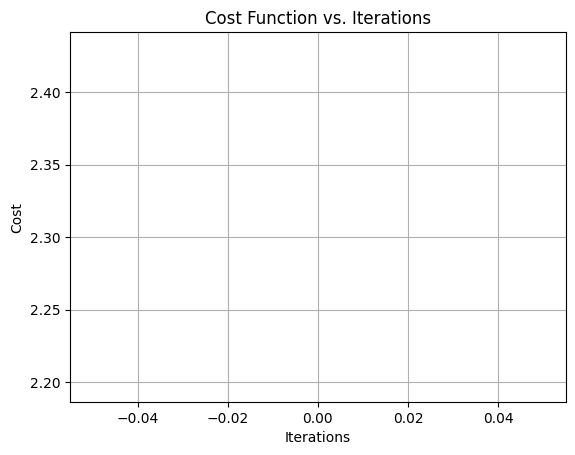

In [35]:
from sklearn.preprocessing import OneHotEncoder

# Check if y_train is one-hot encoded
if len(y_train.shape) == 1:
    encoder = OneHotEncoder(sparse_output=False)  # Use sparse_output=False for newer versions of sklearn
    y_train = encoder.fit_transform(y_train.reshape(-1, 1))  # One-hot encode labels
    y_test = encoder.transform(y_test.reshape(-1, 1))  # One-hot encode test labels

# Now y_train is one-hot encoded, and we can proceed to use it
d = X_train.shape[1]  # Number of features (columns in X_train)
c = y_train.shape[1]  # Number of classes (columns in y_train after one-hot encoding)

# Initialize weights with small random values and biases with zeros
W = np.random.randn(d, c) * 0.01  # Small random weights initialized
b = np.zeros(c)  # Bias initialized to 0

# Set hyperparameters for gradient descent
alpha = 0.1  # Learning rate
n_iter = 100  # Number of iterations to run gradient descent

# Train the model using gradient descent
W_opt, b_opt, cost_history = gradient_descent_softmax(X_train, y_train, W, b, alpha, n_iter, show_cost=True)

# Plot the cost history to visualize the convergence
plt.plot(cost_history)
plt.title('Cost Function vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(True)
plt.show()


## **Evaluating the Model:**

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Evaluation Function
def evaluate_classification(y_true, y_pred):
    """
    Evaluate classification performance using confusion matrix, precision, recall, and F1-score.

    Parameters:
    y_true (numpy.ndarray): True labels
    y_pred (numpy.ndarray): Predicted labels

    Returns:
    tuple: Confusion matrix, precision, recall, F1 score
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Compute precision, recall, and F1-score
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    return cm, precision, recall, f1



Confusion Matrix:
[[1105    0    7    4    5    8   27    2   13    4]
 [   0 1253    8   11    1    8    2    2   36    1]
 [   8   29  967   12   27    0   47   33   40   11]
 [  16   12   39 1024    2   39   12   15   38   22]
 [   1   12    7    1 1030    2   16    6    8   93]
 [  32   39    9  104   22  782   25    9   59   23]
 [  12   12   32    1   11   19 1081    1    8    0]
 [  13   47   24    2   19    3    0 1138   14   39]
 [   9   45   15   64   14   34   12    7  934   26]
 [  16   18   11   17   56    9    2   52   14  999]]
Precision: 0.86
Recall: 0.86
F1-Score: 0.86


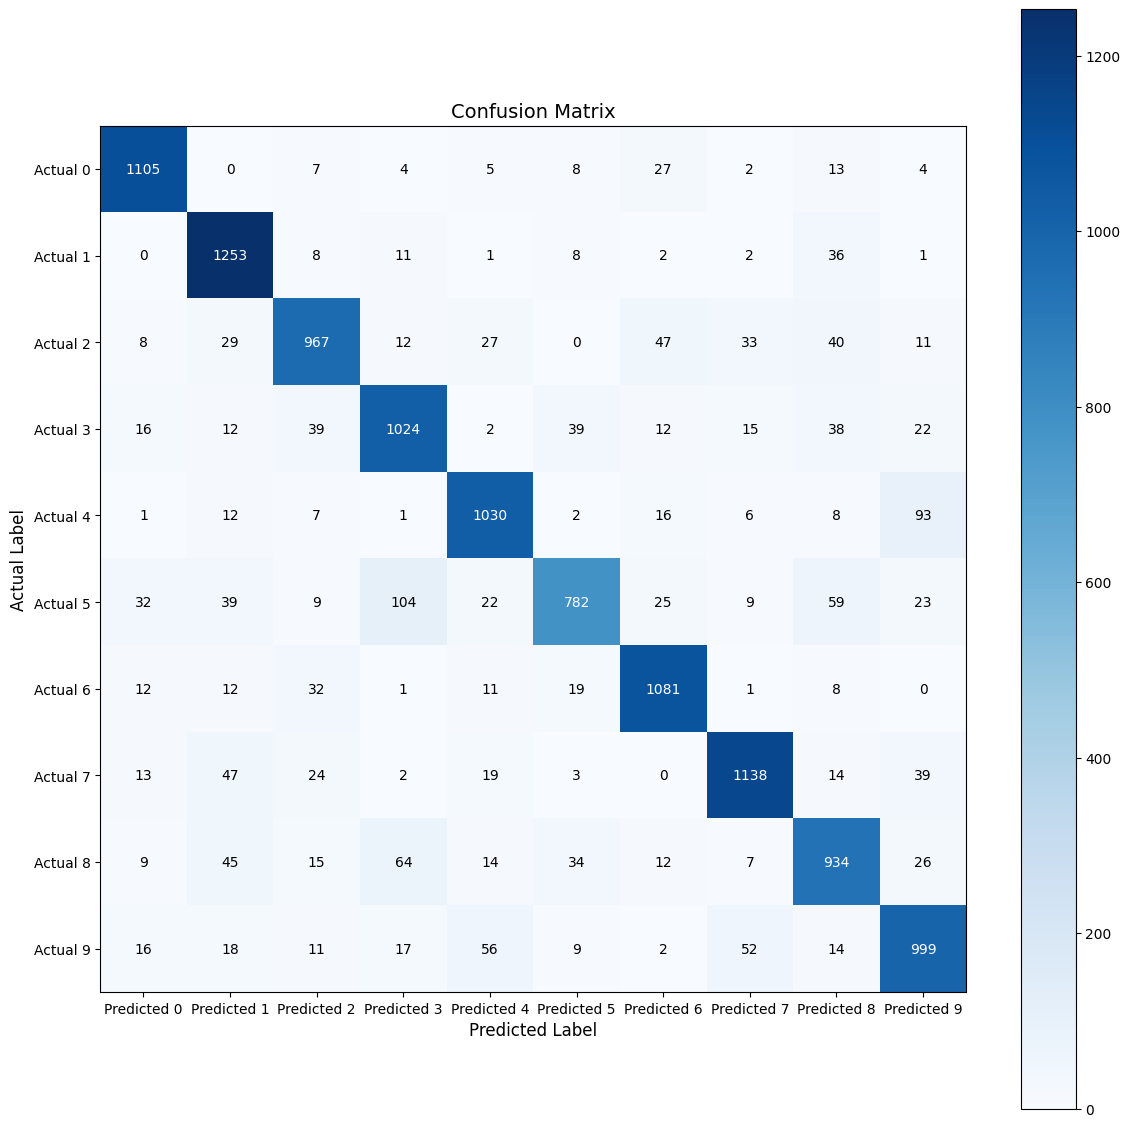

In [37]:
# Predict on the test set
y_pred_test = predict_softmax(X_test, W_opt, b_opt)

# Evaluate accuracy
y_test_labels = np.argmax(y_test, axis=1)  # True labels in numeric form

# Evaluate the model
cm, precision, recall, f1 = evaluate_classification(y_test_labels, y_pred_test)

# Print the evaluation metrics
print("\nConfusion Matrix:")
print(cm)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Visualizing the Confusion Matrix
fig, ax = plt.subplots(figsize=(12, 12))
cax = ax.imshow(cm, cmap='Blues')  # Use a color map for better visualization

# Dynamic number of classes
num_classes = cm.shape[0]
ax.set_xticks(range(num_classes))
ax.set_yticks(range(num_classes))
ax.set_xticklabels([f'Predicted {i}' for i in range(num_classes)])
ax.set_yticklabels([f'Actual {i}' for i in range(num_classes)])

# Add labels to each cell in the confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white' if cm[i, j] > np.max(cm) / 2 else 'black')

# Add grid lines and axis labels
ax.grid(False)
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('Actual Label', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.colorbar(cax)
plt.show()


# Linear Seperability and Logistic Regression:

In [38]:
# Generate and visualize linearly and non-linearly separable data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_circles
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Set random seed
np.random.seed(42)

# Generate linearly separable dataset
X_linear_separable, y_linear_separable = make_classification(
    n_samples=200, n_features=2, n_informative=2,
    n_redundant=0, n_clusters_per_class=1,
    random_state=42
)

# Generate non-linearly separable dataset
X_non_linear_separable, y_non_linear_separable = make_circles(
    n_samples=200, noise=0.1, factor=0.5, random_state=42
)

# Split datasets and train models
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(
    X_linear_separable, y_linear_separable, test_size=0.2, random_state=42
)

X_train_non_linear, X_test_non_linear, y_train_non_linear, y_test_non_linear = train_test_split(
    X_non_linear_separable, y_non_linear_separable, test_size=0.2, random_state=42
)

# Train models
model_linear = LogisticRegression()
model_linear.fit(X_train_linear, y_train_linear)

model_non_linear = LogisticRegression()
model_non_linear.fit(X_train_non_linear, y_train_non_linear)

# Plot results as shown in the starter code

LogisticRegression()